In [9]:
import numpy as np

with open('input.txt') as f:
    lines = f.readlines()

points = np.array([[int(c) for c in line.strip().split(',')] for line in lines], dtype=np.int64)

In [10]:
num_points = points.shape[0]
r1, r2 = np.triu_indices(num_points, k=1)
pairs = np.column_stack((r1, r2))

diff = np.abs(points[r1] - points[r2]) + 1
areas = np.prod(diff, axis=1)

sorted_indices = np.argsort(areas)
print("Part 1:", areas[sorted_indices[-1]])

Part 1: 4746238001


In [ ]:
def ray_casting(point: tuple[int, int], points) -> bool:
    y, x = point
    inside = False
    for point_a, point_b in zip(points, np.roll(points, -1, axis=0)):
        ay, ax = point_a
        by, bx = point_b
        
        # Check if point sits on chord, if so, consider it inside
        for (py, px) in (point_a, point_b):
            if (y == py) and min(ax, bx) <= x <= max(ax, bx):
                return True
            if (x == px) and min(ay, by) <= y <= max(ay, by):
                return True
        
        if ((ay > y) != (by > y)) and (x < (bx - ax) * (y - ay) / (by - ay) + bx):
            inside = not inside
    return inside

def do_lines_intersect(p1: np.ndarray, p2, q1: np.ndarray, q2: np.ndarray) -> bool:
    """ Check if two line segments (p1, p2) and (q1, q2) intersect, following this algorithm: https://stackoverflow.com/questions/563198/how-do-you-detect-where-two-line-segments-intersect"""
    
    def cross_2d(v, w):
        return v[0] * w[1] - v[1] * w[0]

    r = p2 - p1
    s = q2 - q1
    
    denominator = cross_2d(r, s)
    uNumerator = cross_2d((q1 - p1), r)
    
    if denominator == 0:
        if uNumerator == 0:
            # collinear is fine
            return False
        else:
            # parallel and non-intersecting
            return False
    else:
        t = cross_2d((q1 - p1), s) / denominator
        u = uNumerator / denominator
        if (0 <= t <= 1) and (0 <= u <= 1):
            intersect_point = p1 + t * r
            if np.allclose(intersect_point, p1) or np.allclose(intersect_point, p2) or np.allclose(intersect_point, q1) or np.allclose(intersect_point, q2):
                return False
            return True
    return False

# O(n²) algorithm to check for every pair if one point does not lie within it

a, b = None, None
for i, pair_idx in enumerate(reversed(sorted_indices)):
    if i % 1000 == 0:
        percent = i / len(sorted_indices)
        print(f"Checking pair {i} / {len(sorted_indices)} ({percent:.2%})")
    a, b = points[pairs[pair_idx][0]], points[pairs[pair_idx][1]]
    
    # Ray casting algorithm to check if both new corner points are inside the polygon
    
    one_corner = (a[0], b[1])
    other_corner = (b[0], a[1])
    corners = np.array([a, one_corner, b, other_corner])
    for p1, p2 in zip(corners, np.roll(corners, -1, axis=0)):
        for q1, q2 in zip(points, np.roll(points, -1, axis=0)):
            if do_lines_intersect(p1, p2, q1, q2):
                break
        else:
            continue
        break
    else:
        if not ray_casting(one_corner, points) or not ray_casting(other_corner, points):
            continue
       
        print(f"Part 2: {areas[pair_idx]} with points {a} and {b}")
        break   
    

Checking pair 0 / 122760 (0.00%)
Checking pair 1000 / 122760 (0.81%)
Checking pair 2000 / 122760 (1.63%)
Checking pair 3000 / 122760 (2.44%)
Checking pair 4000 / 122760 (3.26%)
Checking pair 5000 / 122760 (4.07%)
Checking pair 6000 / 122760 (4.89%)
Checking pair 7000 / 122760 (5.70%)
Checking pair 8000 / 122760 (6.52%)
Checking pair 9000 / 122760 (7.33%)
Checking pair 10000 / 122760 (8.15%)
Checking pair 11000 / 122760 (8.96%)
Checking pair 12000 / 122760 (9.78%)
Checking pair 13000 / 122760 (10.59%)
Checking pair 14000 / 122760 (11.40%)
Checking pair 15000 / 122760 (12.22%)
Checking pair 16000 / 122760 (13.03%)
Checking pair 17000 / 122760 (13.85%)
Checking pair 18000 / 122760 (14.66%)
Checking pair 19000 / 122760 (15.48%)
Checking pair 20000 / 122760 (16.29%)
Checking pair 21000 / 122760 (17.11%)
Checking pair 22000 / 122760 (17.92%)
Checking pair 23000 / 122760 (18.74%)
Checking pair 24000 / 122760 (19.55%)
Checking pair 25000 / 122760 (20.36%)
Checking pair 26000 / 122760 (21.18%)


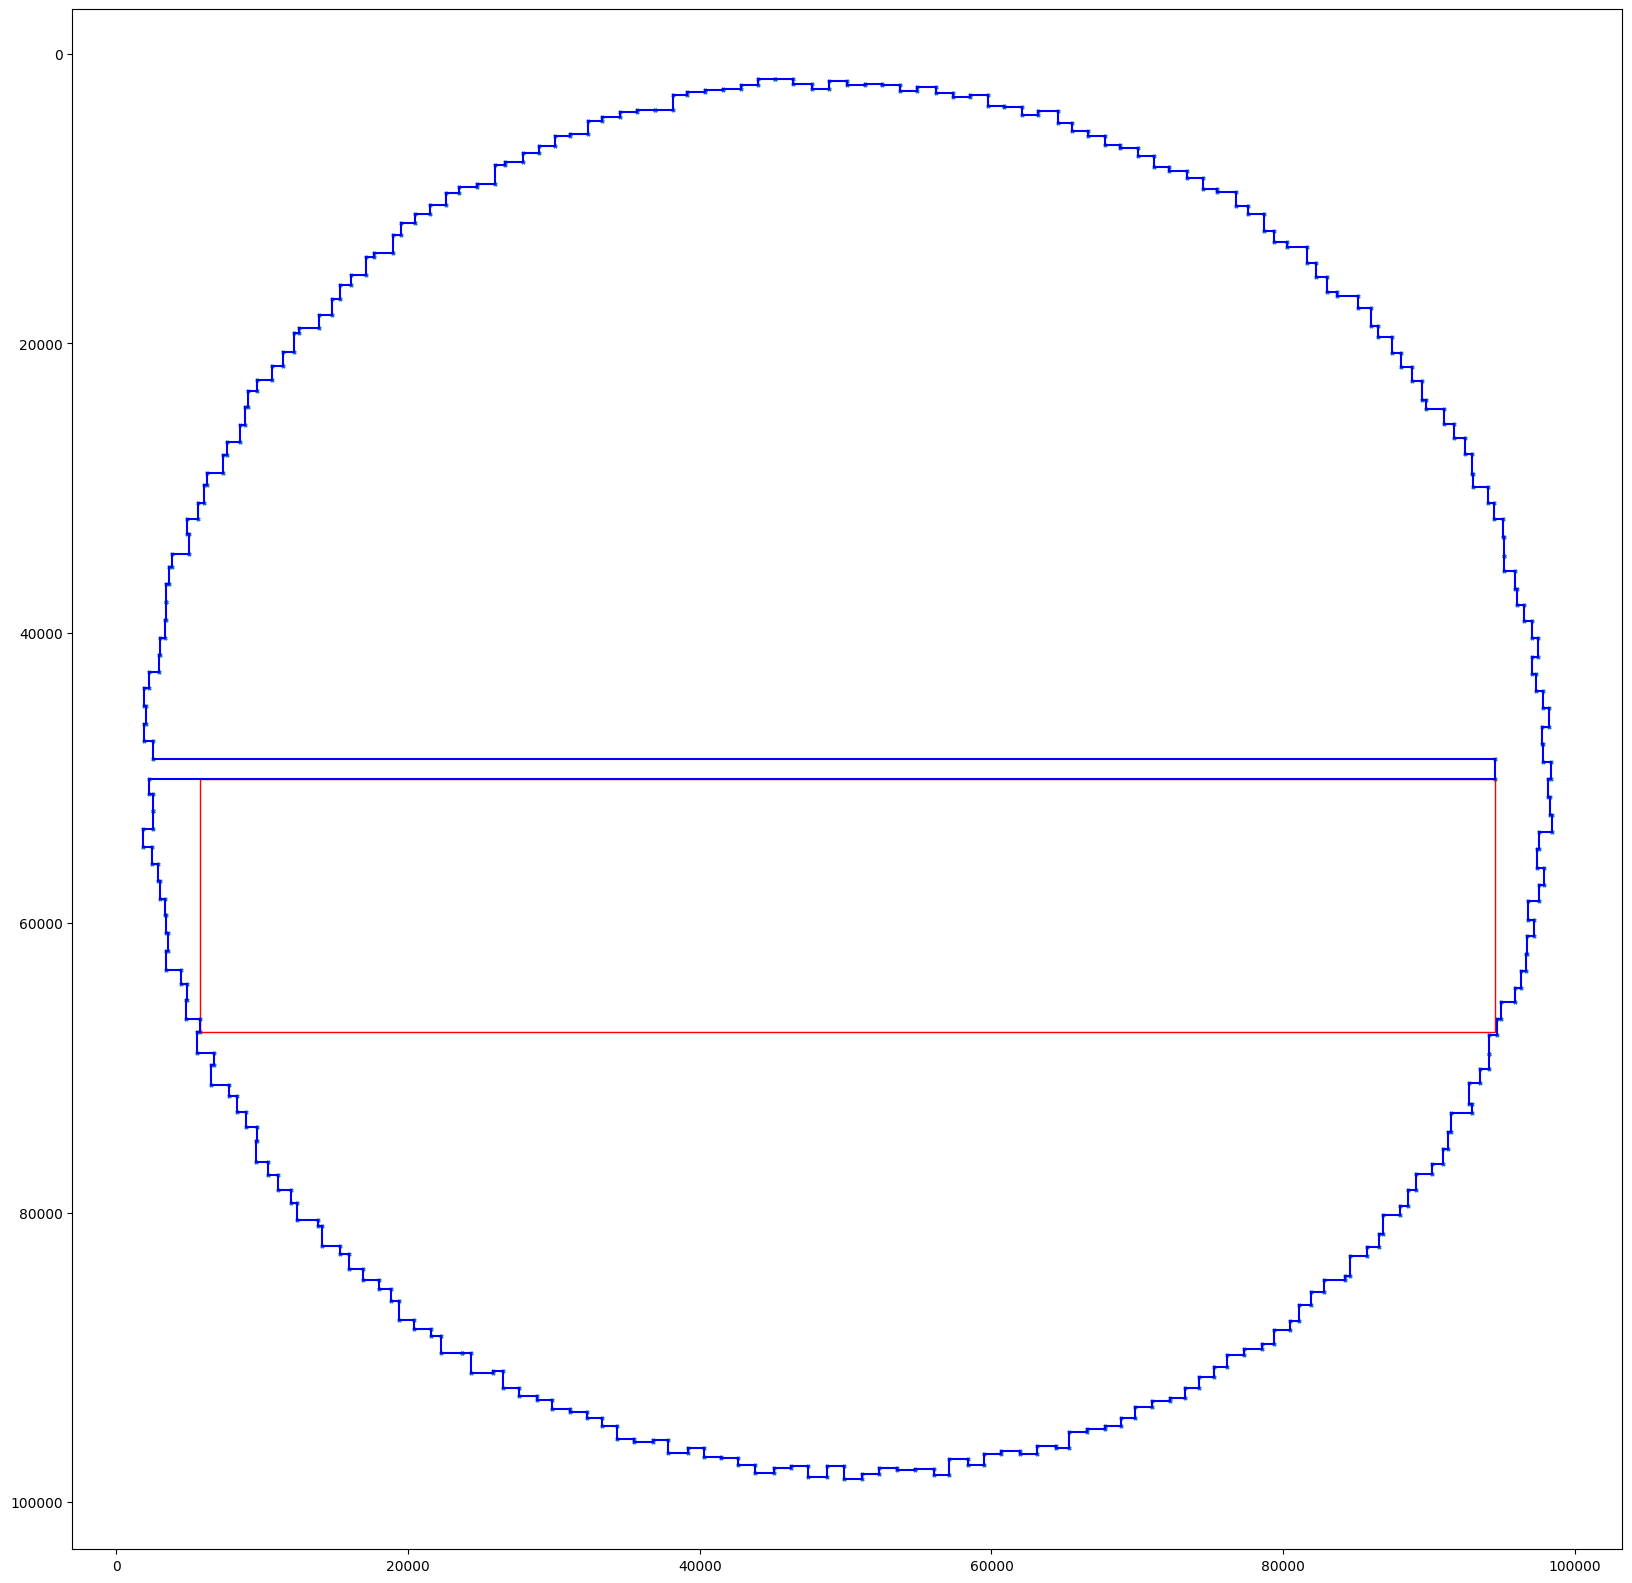

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,20))
ax.scatter(points[:,0], points[:,1], s=5, marker = 'x')
for c, d in zip(points, np.roll(points, -1, axis=0)):
    ax.plot([c[0], d[0]], [c[1], d[1]], 'b-')

rect = plt.Rectangle((min(a[0], b[0]), min(a[1], b[1])), abs(a[0]-b[0]), abs(a[1]-b[1]), linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.invert_yaxis()
plt.show()